In [51]:
#! pip install neo4j


# Creating a knowledge graph in neo4j 

Here we provide a sample notebook for KG construction with hypothetical graph data where there are 3 typrs of nodes and one relationship. Following are the general steps for KG set up for personal PC:

- First download and install the neo4j Desktop on your computer.
- Create a new project.
- Click on ```ADD``` tab right to the project and add local DBMS. Make sure your user and passwords are noted for future access.
- Install ```apoc``` library through plugin.
- Open config folder and put provided ```neo4j.config``` and ```apoc.config```.
    	a. Click on the 3 dots on the right of the graph DBMS.
		b. Click open
		c. Click configuration
		d. Copy and paste provided neo4j.config and apoc.config there.
- Start the graph database
- Click open tab of the DBMS to open neo4j Browser.
- Install ```anaconda``` python and run ```Jupyter application```
- Use this notebook to communicate with graph database

In [2]:
import pandas as pd
import json
import time
from neo4j import GraphDatabase

#### Make a connection with Graph Database

In [1]:
import pandas as pd
from neo4j import GraphDatabase
driver=GraphDatabase.driver(uri="bolt://127.0.0.1:7687",auth=("neo4j","12345678"))
session=driver.session()

In [3]:
driver

#### Create Constraints for uniqueness of nodes

In [58]:
def create_constraints(driver):
        '''
        Create constraints for nodes in the graph
        args:
            driver: neo4j driver
        returns:
            None
        '''
        query = ["CREATE CONSTRAINT UniqueOrganismNameConstraint FOR (O:Organism) REQUIRE O.name IS UNIQUE",\
                "CREATE CONSTRAINT UniqueProteinIdConstraint FOR (P:Protein) REQUIRE P.UID IS UNIQUE",\
                "CREATE CONSTRAINT UniquePTMTypeNameConstraint FOR (PTM:PTM_Type) REQUIRE PTM.name IS UNIQUE",\
                "CREATE CONSTRAINT UniqueCellLineNameConstraint FOR (C:cellLine) REQUIRE C.name IS UNIQUE",\
                "CREATE CONSTRAINT UniqueReferenceIdConstraint FOR (R:references) REQUIRE R.Pmid IS UNIQUE",\
                "CREATE CONSTRAINT UniquePathwayIdConstraint FOR (Pw: Pathway) REQUIRE Pw.ID IS UNIQUE"]
        
        query2 = [ "CREATE CONSTRAINT UniqueLocationConstraint FOR (L:Location) REQUIRE L.LID IS UNIQUE"]

        with driver.session() as session:
            for constraint in query2:
                session.run(constraint)


                

In [70]:
print(create_constraints.__doc__)


        Create constraints for nodes in the graph
        args:
            driver: neo4j driver
        returns:
            None
        


In [60]:
'''UNCOMMENT AND RUN THIS CELL ONLY ONCE'''
#create_constraints(driver)

### Populate Node
- There are three arbitrary node types
- There are one edge types between nodes.

In [71]:
{'Organism': 'Mus musculus',
 'Uniprot_AC': 'Q61598',
 'position': 317,
 'standard_seq': 'EKVGQVIRVICILSHPIKNTNDANSCQIIIPQNQVNRKSDIYVCMISFAHN',
 'PTM_Catalogy': 'Oxidation PTM',
 'PTM_Type': 'S-nitrosylation',
 'ref': '28710281',
 'cell_line': 'Ischemia heart cells',
 'Identification_Strategy': 'Thiol isotope labeling',
 'Identification_Technique': 'SNOxICAT'}

{'Organism': 'Mus musculus',
 'Uniprot_AC': 'Q61598',
 'position': 317,
 'standard_seq': 'EKVGQVIRVICILSHPIKNTNDANSCQIIIPQNQVNRKSDIYVCMISFAHN',
 'PTM_Catalogy': 'Oxidation PTM',
 'PTM_Type': 'S-nitrosylation',
 'ref': '28710281',
 'cell_line': 'Ischemia heart cells',
 'Identification_Strategy': 'Thiol isotope labeling',
 'Identification_Technique': 'SNOxICAT'}

In [72]:
def create_organism_node(data):
        '''  
        Create Organism node in the graph
         args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (O:Organism{name:value.Organism})"
            
            #print(query)
            tx.run(query,data=data)
        
        with driver.session() as session:   
            session.execute_write(tx_function,data)
            

            
def create_protein_node(data):
        '''
        Create Protein node in the graph
        args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (P:Protein{UID:value.Uniprot_AC})\
            ON CREATE SET P.standard_seq=value.standard_seq,\
            P.position=value.position"
            
            #print(query)
            tx.run(query,data=data)
        
        with driver.session() as session:   
            session.execute_write(tx_function,data)



            
def create_ptmtype_node(data):
        '''
        Create PTM_Type node in the graph
        args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (PTM:PTM_Type{name:value.PTM_Type})\
            ON CREATE SET PTM.PTM_Catalogy=value.PTM_Catalogy"
            
            #print(query)
            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)


            

def create_cellline_node(data):
        '''
        Create cellLine node in the graph
        args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (C:cellLine{name:value.cell_line})\
            ON CREATE SET C.Identification_Strategy=value.Identification_Strategy,\
            C.Identification_Technique=value.Identification_Technique"
            
            #print(query)
            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)





def create_reference_node(data):
        '''
        Create references node in the graph
        args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (R:references{Pmid:value.ref})"
            
            
            #print(query)
            tx.run(query,data=data)
        
        with driver.session() as session:   
            session.execute_write(tx_function,data)


def create_location_node(data):
        '''
        Create references node in the graph
        args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (L:Location{LID:value.LID})\
            ON CREATE SET L.Sequence=value.standard_seq,\
            L.Location=value.position"
            
            
            #print(query)
            tx.run(query,data=data)
        
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [73]:
t1 = time.time()
data = "data.json"
create_organism_node(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.29370999336242676


In [74]:
t1 = time.time()
data = "data.json"
create_protein_node(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.5182251930236816


In [75]:
t1 = time.time()
data = "data.json"
create_ptmtype_node(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.23247933387756348


In [76]:
t1 = time.time()
data = "data.json"
create_cellline_node(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.23611187934875488


In [77]:
t1 = time.time()
data = "data.json"
create_reference_node(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.19608235359191895


In [78]:
t1 = time.time()
data = "data.json"
create_location_node(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.8331589698791504


### Create Edges

In [81]:
def create_edge_protein2location(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (P {UID:value.Uniprot_AC})\
            MATCH (L {LID:value.LID})\
            MERGE (P)-[:HAS_CYSTEINE]->(L)"

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [82]:
t1 = time.time()
data = "data.json"
create_edge_protein2location(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  1126.3054032325745


In [4]:
def create_edge_location2ptm_type(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (L {LID:value.LID})\
            MATCH (PTM {name:value.PTM_Type})\
            MERGE (L)-[:HAS_PTM_TYPE]->(PTM)"

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [5]:
t1=time.time()
data = "data.json"
create_edge_location2ptm_type(data)
t2=time.time()
print( "success! total time: ", t2-t1)

success! total time:  1044.7420127391815


In [6]:
def create_edge_ptm2cellline(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (PTM {name:value.PTM_Type})\
            MATCH (C {name:value.cell_line})\
            MERGE (PTM)-[:FROM]->(C)"

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [7]:
t1=time.time()
data = "data.json"
create_edge_ptm2cellline(data)
t2=time.time()
print( "success! total time: ", t2-t1)

success! total time:  845.1974122524261


In [8]:
def create_edge_cellline2reference(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (C {name:value.cell_line})\
            MATCH (R {Pmid:value.ref})\
            MERGE (C)-[:HAS_REFERENCE]->(R)"

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [9]:
t1=time.time()
data = "data.json"
create_edge_cellline2reference(data)
t2=time.time()
print( "success! total time: ", t2-t1)

success! total time:  829.3450391292572


In [10]:
def create_edge_ptm2reference(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (PTM {name:value.PTM_Type})\
            MATCH (R {Pmid:value.ref})\
            MERGE (PTM)-[:HAS_REFERENCE]->(R)"

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [11]:
t1=time.time()
data = "data.json"
create_edge_ptm2reference(data)
t2=time.time()
print( "success! total time: ", t2-t1)

success! total time:  828.799971818924


In [12]:
def create_edge_ptm2organism(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (PTM {name:value.PTM_Type})\
            MATCH (O {name:value.Organism})\
            MERGE (PTM)-[:BELONGS_TO]->(O)"

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [13]:
t1=time.time()
data = "data.json"
create_edge_ptm2organism(data)
t2=time.time()
print( "success! total time: ", t2-t1)

success! total time:  848.8454530239105


In [14]:
def create_edge_protein2organism(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (P {UID:value.Uniprot_AC})\
            MATCH (O {name:value.Organism})\
            MERGE (P)-[:BELONGS_TO]->(O)"
        

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [15]:
t1=time.time()
data = "data.json"
create_edge_protein2organism(data)
t2=time.time()
print( "success! total time: ", t2-t1)

success! total time:  856.0041120052338


### Reactome Update

In [41]:
def create_pathway_node_small(data):
        '''  
        Create Pathway node in the graph
         args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (Pw:Pathway{ID:value.Pathway_identifier})\
            ON CREATE SET Pw.name=value.Pathway_name"
            
            #print(query)
            tx.run(query,data=data)
        
        with driver.session() as session:   
            session.execute_write(tx_function,data)

def create_pathway_node_large(data):
        '''  
        Create Pathway node in the graph
         args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (Pw:Pathway{ID:value.ID})\
            ON CREATE SET Pw.name=value.name"
            
            #print(query)
            tx.run(query,data=data)
        
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [42]:
t1 = time.time()
data = "pathway-data-large.json"
create_pathway_node_large(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.626776933670044


In [44]:
def create_edge_protein2pathway_small(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (P {UID:value.Mapped_entities})\
            MATCH (Pw {ID:value.Pathway_identifier})\
            MERGE (P)-[:ASSOCIATED]->(Pw)"

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

def create_edge_protein2pathway_large(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (P {UID:value.protein})\
            MATCH (Pw {ID:value.ID})\
            MERGE (P)-[:ASSOCIATED]->(Pw)"

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [45]:
t1 = time.time()
data = "pathway-data-large.json"
create_edge_protein2pathway_large(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  1380.0068852901459


### Add PPI data

In [28]:
def create_ppi_proteinA_node(data):
        '''  
        Create PPI protein node in the graph
         args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (P:Protein{UID:value.IDA})\
            ON CREATE SET P.molecule=value.Molecule_A"
            
            #print(query)
            tx.run(query,data=data)
        
        with driver.session() as session:   
            session.execute_write(tx_function,data)


def create_ppi_proteinB_node(data):
        '''  
        Create PPI protein node in the graph
         args:
            data: dictionary containing the data for the node
        returns:
            None
        '''
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MERGE (P:Protein{UID:value.IDA})\
            ON CREATE SET P.molecule=value.Molecule_B"
            
            #print(query)
            tx.run(query,data=data)
        
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [29]:
t1 = time.time()
data = "ppi.json"
create_ppi_proteinA_node(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.06410813331604004


In [30]:
t1 = time.time()
data = "ppi.json"
create_ppi_proteinB_node(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.016520977020263672


In [31]:
def create_edge_ppi(data):
        def tx_function(tx,data):
            query = "WITH '" + data  + "' as url \
            CALL apoc.load.json(url) YIELD value \
            MATCH (PA:Protein {UID:value.IDA})\
            MATCH (PB:Protein {UID:value.IDB})\
            MERGE (PA)-[:HAS_PPI_INTERACTION]->(PB)"

            tx.run(query,data=data)
        with driver.session() as session:   
            session.execute_write(tx_function,data)

In [32]:
t1 = time.time()
data = "ppi.json"
create_edge_ppi(data)
t2 = time.time()
print( "success! total time: ", t2-t1)

success! total time:  0.03675699234008789


### References

https://neo4j.com/docs/cypher-cheat-sheet/current/

Link Prediction

In [7]:
query = "MATCH (P:Protein) RETURN P.UID"

res = []
with driver.session() as session:
    info = session.run(query)
    for item in info:
        res.append({"ID":item.values()[0]})
df2 = pd.DataFrame(res)
df2.shape

(15455, 1)

In [8]:
df2['ID'][0]

'Q61598'

In [9]:
query = "MATCH (PTM:PTM_Type) RETURN PTM.name"

res = []
with driver.session() as session:
    info = session.run(query)
    for item in info:
        res.append({"name":item.values()[0]})
df1 = pd.DataFrame(res)
df1.shape

(13, 1)

In [10]:
df1['name'][0]

'S-nitrosylation'

In [11]:
res = []

for p in df2["ID"]:
    for ptm in df1["name"]:
    
        query = "MATCH (P:Protein {UID: '" + p + "'}) \
        MATCH (PTM:PTM_Type {name: '" + ptm + "'}) \
        RETURN gds.alpha.linkprediction.totalNeighbors(P, PTM, \
        {relationshipQuery: null})\
        AS Score, P.UID AS protein, PTM.name AS ptm_type"

        with driver.session() as session:
            info = session.run(query)
            for item in info:
                res.append({"Protein":item.values()[1], 
                            "PTM":item.values()[2],
                            "Score":item.values()[0]})

In [12]:
df_res = pd.DataFrame(res)
df_res = df_res.sort_values("Score", ascending = False)
df_res.head(15)

,Protein,PTM,Score
37114,P49327,S-oxidation(nec.),8278.0
37283,P04406,S-oxidation(nec.),8276.0
37348,P10809,S-oxidation(nec.),8276.0
37335,P21333,S-oxidation(nec.),8276.0
41092,P46782,S-oxidation(nec.),8275.0
37218,P13639,S-oxidation(nec.),8274.0
37309,P23528,S-oxidation(nec.),8273.0
40884,Q15365,S-oxidation(nec.),8273.0
37140,P26641,S-oxidation(nec.),8273.0
36984,P61247,S-oxidation(nec.),8273.0


In [13]:
df_res.to_csv("res.csv", index = False)

In [32]:
df_res.shape

(200915, 3)

In [33]:
mapping = {}
for p,ptm,score in zip(df_res['Protein'],df_res['PTM'],df_res['Score']):
    mapping.update({p+":"+ptm:score})


Protein = list(set(df_res['Protein']))
PTM = list(set(df_res['PTM']))
DATA = []
for p in Protein:
    data =  {}
    data.update({"Protein": p})
    for ptm in PTM:
        data.update({ptm:mapping[p+":"+ptm]})
    DATA.append(data)
    
df = pd.DataFrame(DATA)
df = df.set_index("Protein")
df.head()

,S-glutathionylation,S-oxidation(nec.),S-succination,S-carbonylation,S-prenylation,S-palmitoylation,S-nitrosylation,S-sulfenylation,S-sulfonylation,S-sulfinylation,S-disulfidation,S-itaconation,S-persulfidation
Protein,,,,,,,,,,,,,
M0R2D3,2984.0,8251.0,882.0,448.0,77.0,3151.0,4634.0,1893.0,71.0,366.0,257.0,862.0,1480.0
O54824,2983.0,8248.0,882.0,449.0,78.0,3153.0,4635.0,1896.0,71.0,367.0,258.0,859.0,1480.0
B4E2Q0,2981.0,8248.0,879.0,445.0,74.0,3148.0,4631.0,1892.0,68.0,363.0,254.0,859.0,1477.0
Q60649,2983.0,8248.0,882.0,449.0,78.0,3151.0,4635.0,1896.0,71.0,367.0,258.0,861.0,1480.0
Q96MU7,2981.0,8248.0,879.0,445.0,74.0,3149.0,4630.0,1892.0,68.0,363.0,254.0,859.0,1477.0


<AxesSubplot:ylabel='Protein'>

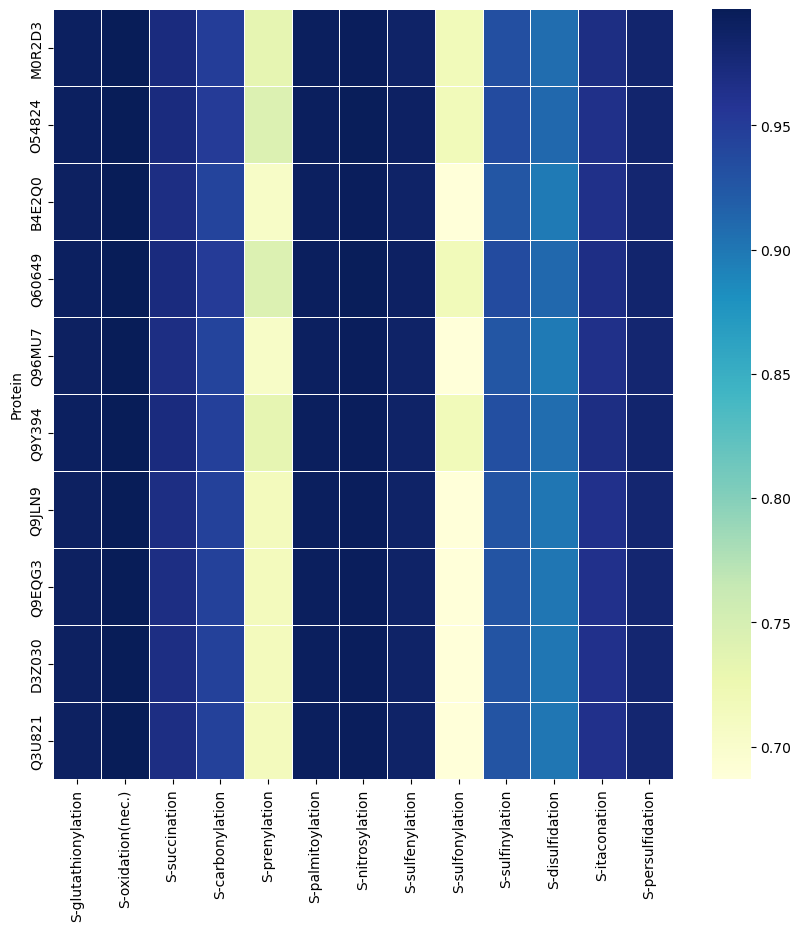

In [34]:
import matplotlib.pyplot as plt
df = df/df.max()
plt.figure(figsize = [10,10])
sns.heatmap(df[0:10],cmap="YlGnBu", linewidths=.5)

In [35]:
df.shape

(15455, 13)

<AxesSubplot:>

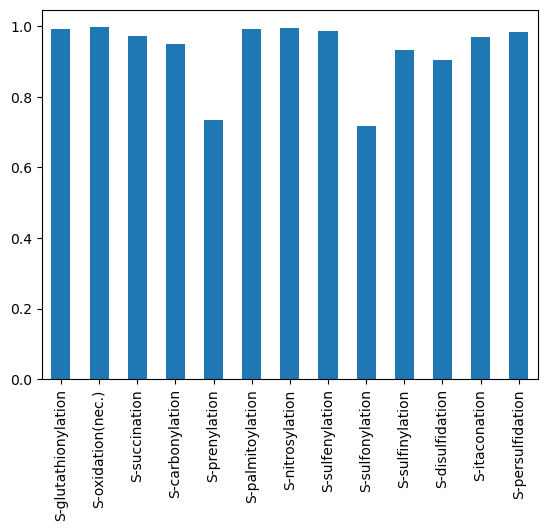

In [38]:
df.loc["P12235",:].plot.bar()